<a href="https://colab.research.google.com/github/vickidecastro/comparing-baltimore-miami-teenage-birthrates-using-python/blob/main/BA_mini_project_4_python_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project #4
## Comparing Teenage Birth Rates of Females from Low-Income Families in Baltimore, MD and Miami, FL using Python


How do the teen birth rates from females in low-income families in Baltimore, MD and Miami, FL compare?


---



# Import Libraries

In [1]:
pip install plotly

In [2]:
# import libraries

#for data analysis
import pandas as pd
import numpy as np
# for visualization
import plotly.express as px

# Import data

In [3]:
# import data 
# Teen birth rates LI families Baltimore
df_baltimore = pd.read_csv("https://raw.githubusercontent.com/vickidecastro/comparing-baltimore-miami-teenage-birthrate-lowincome-parents/master/shown_tract_teenbirth_rP_gF_p25%20baltimore.csv")
# Teen birth rates LI families Miami
df_miami = pd.read_csv("https://raw.githubusercontent.com/vickidecastro/comparing-baltimore-miami-teenage-birthrate-lowincome-parents/master/shown_tract_teenbirth_rP_gF_p25%20miami.csv")

In [4]:
# preview data
df_baltimore.head()

,tract,Name,Teenage_Birth_Rate_women_only_rP_gF_p25
0,24510250204,"Cherry Hill, Baltimore, MD",0.6414
1,24510280500,"Pleasant View Gardens, Baltimore, MD",0.6380
2,24510100200,"Baltimore, MD",0.6253
3,24510271102,"Mid-Charles, Baltimore, MD",0.6247
4,24510200100,"Lexington, Baltimore, MD",0.6194


In [5]:
# preview data
df_miami.head()

,tract,Name,Teenage_Birth_Rate_women_only_rP_gF_p25
0,12086001501,"Model City, Miami, FL",0.5500
1,12086007200,"Coconut Grove, Miami, FL",0.5497
2,12086003400,"Overtown, Miami, FL",0.5416
3,12086001004,"Miami, FL",0.5390
4,12086001903,"Model City, Miami, FL",0.5384


In [6]:
# column names
df_baltimore.columns

Index(['tract', 'Name', 'Teenage_Birth_Rate_women_only_rP_gF_p25'], dtype='object')

In [7]:
df_baltimore.columns = ['tract','Neighborhood','Teenage Birth Rate']
df_miami.columns = ['tract','Neighborhood','Teenage Birth Rate']
df_baltimore.head()

,tract,Neighborhood,Teenage Birth Rate
0,24510250204,"Cherry Hill, Baltimore, MD",0.6414
1,24510280500,"Pleasant View Gardens, Baltimore, MD",0.6380
2,24510100200,"Baltimore, MD",0.6253
3,24510271102,"Mid-Charles, Baltimore, MD",0.6247
4,24510200100,"Lexington, Baltimore, MD",0.6194


In [8]:
df_baltimore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tract               365 non-null    int64  
 1   Neighborhood        365 non-null    object 
 2   Teenage Birth Rate  359 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


Pivot Tables Using Python

In [32]:
#bmore pivot
bmore_pivot= pd.pivot_table(df_baltimore, values= ['Teenage Birth Rate'], index=['Neighborhood'], aggfunc=np.mean)
bmore_pivot

,Teenage Birth Rate
Neighborhood,
"Allendale, Baltimore, MD",0.47770
"Arcadia, Baltimore, MD",0.45250
"Arlington, Baltimore, MD",0.53200
"Armistead Gardens, Baltimore, MD",0.32730
"Baltimore Highlands, Baltimore, MD",0.44335
...,...
"Woodberry, Baltimore, MD",0.39910
"Woodbrook, Baltimore, MD",0.50050
"Woodlawn, MD",0.33850


In [11]:
bmore_pivot2=bmore_pivot.reindex(bmore_pivot.sort_values(by='Teenage Birth Rate', ascending=False).index)
bmore_pivot2

,Teenage Birth Rate
Neighborhood,
"Pleasant View Gardens, Baltimore, MD",0.6380
"Mid-Charles, Baltimore, MD",0.6247
"Barclay, Baltimore, MD",0.6167
"Langston Hughes, Baltimore, MD",0.6038
"Oliver, Baltimore, MD",0.5995
...,...
"West Elkridge, Elkridge, MD",0.0847
"Roland Park, Baltimore, MD",0.0828
"Ellicott City, MD",0.0718


In [12]:
bmore_pivot.sort_values('Teenage Birth Rate', ascending=False)
# this does the same thing as above^

,Teenage Birth Rate
Neighborhood,
"Pleasant View Gardens, Baltimore, MD",0.6380
"Mid-Charles, Baltimore, MD",0.6247
"Barclay, Baltimore, MD",0.6167
"Langston Hughes, Baltimore, MD",0.6038
"Oliver, Baltimore, MD",0.5995
...,...
"West Elkridge, Elkridge, MD",0.0847
"Roland Park, Baltimore, MD",0.0828
"Ellicott City, MD",0.0718


In [33]:
#mia pivot
mia_pivot= pd.pivot_table(df_miami, values= 'Teenage Birth Rate', index=["Neighborhood"], aggfunc=np.mean)
mia_pivot

,Teenage Birth Rate
Neighborhood,
"Allapattah, Miami, FL",0.314138
"Bal Harbour, FL",0.058100
"Bay Harbor Islands, FL",0.136700
"Bayshore, Miami Beach, FL",0.064300
"Biscayne Point, Miami Beach, FL",0.184500
...,...
"Upper East Side, Miami, FL",0.231500
"Venetian Islands, Miami Beach, FL",0.050200
"West Avenue, Miami Beach, FL",0.158167


In [14]:
mia_pivot2=mia_pivot.reindex(mia_pivot.sort_values(by='Teenage Birth Rate', ascending=False).index)
mia_pivot2

,Teenage Birth Rate
Neighborhood,
"Model City, Miami, FL",0.509980
"Brownsville, Miami, FL",0.472775
"Overtown, Miami, FL",0.459100
"Opa-locka, FL",0.416533
"Wynwood, Miami, FL",0.399100
...,...
"Bal Harbour, FL",0.058100
"Venetian Islands, Miami Beach, FL",0.050200
"Pinecrest, FL",0.042050


In [15]:
# mia_pivot.sort_values('Teenage Birth Rate', ascending=False).head()

# make dataframe of five neighborhoods with highest birth rates mia
mia_top5 = mia_pivot2.reset_index().head()
mia_top5

,Neighborhood,Teenage Birth Rate
0,"Model City, Miami, FL",0.509980
1,"Brownsville, Miami, FL",0.472775
2,"Overtown, Miami, FL",0.459100
3,"Opa-locka, FL",0.416533
4,"Wynwood, Miami, FL",0.399100


In [16]:
# make dataframe of five neighborhoods with highest birth rates bmore
bmore_top5=bmore_pivot2.reset_index().head()
bmore_top5

,Neighborhood,Teenage Birth Rate
0,"Pleasant View Gardens, Baltimore, MD",0.6380
1,"Mid-Charles, Baltimore, MD",0.6247
2,"Barclay, Baltimore, MD",0.6167
3,"Langston Hughes, Baltimore, MD",0.6038
4,"Oliver, Baltimore, MD",0.5995


In [17]:
# Mean, Min, Max


Bar Graph of Teen Birth Rate Data


In [18]:
# bar graph mia
bar_mia= px.bar(data_frame=mia_top5, x="Neighborhood",y="Teenage Birth Rate")
bar_mia

In [19]:
# bar graph bmore
bar_bmore=px.bar(data_frame=bmore_top5, x="Neighborhood", y="Teenage Birth Rate")
bar_bmore

In [20]:
b=mia_top5.append(bmore_top5)
b['City']=["Miami","Miami","Miami","Miami","Miami","Baltimore","Baltimore","Baltimore","Baltimore","Baltimore",]

In [21]:
bar_both=px.bar(data_frame=b, x="Neighborhood", y="Teenage Birth Rate",color='City')
bar_both.show()

In [22]:
# mean birth rate for all neighborhoods in bmore
mean_bmore=bmore_pivot2.mean()
mean_bmore

Teenage Birth Rate    0.410749
dtype: float64

In [23]:
# mean birth rate for all neighborhoods in mia
mean_mia=mia_pivot2.mean()
mean_mia

Teenage Birth Rate    0.181946
dtype: float64

In [24]:
# min birth rate for all neighborhoods in bmore
min_bmore=bmore_pivot2.min()
min_bmore

Teenage Birth Rate    0.0691
dtype: float64

In [25]:
# min birth rate for all neighborhoods in mia
min_mia=mia_pivot2.min()
min_mia

Teenage Birth Rate    0.012
dtype: float64

In [26]:
# max birth rate for all neighborhoods in bmore
max_bmore=bmore_pivot2.max()
max_bmore

Teenage Birth Rate    0.638
dtype: float64

In [27]:
# max birth rate for all nieghborhoods in mia
max_mia=np.max(mia_pivot2)
max_mia

Teenage Birth Rate    0.50998
dtype: float64

In [35]:
data = {'City':  ['Baltimore','Miami','Baltimore','Miami','Baltimore','Miami'],
        'Statistic': ['Minimum','Minimum','Mean','Mean','Maximum','Maximum'],
        'Teenage Birth Rate': map(float,[min_bmore,min_mia,mean_bmore,mean_mia,max_bmore,max_mia])}
p=pd.DataFrame(data)
bar_stats=px.bar(data_frame=p, x='Statistic',y="Teenage Birth Rate",color='City',barmode='group')
bar_stats.show()

Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe50d5a8198>]],
      dtype=object)

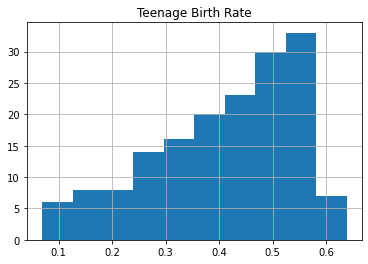

In [39]:
bmore_pivot2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe50e76f518>]],
      dtype=object)

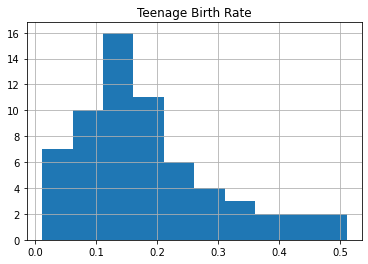

In [30]:
mia_pivot2.hist()